In [53]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [54]:
train_df = pd.read_csv("./train.tsv", sep='\t', header=None)
train_data = train_df.to_numpy()
X_train = train_data[:, 0:-1]  # select columns 1 through end
y_train = train_data[:, -1]   # select column 0, the stock price
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)


In [55]:
pd.DataFrame(X_train[:, 0:-1]).corr()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,1.000000,0.438183,0.412573,0.426021,0.431958,0.417211,0.439959,0.424338,0.418095,0.428815,...,0.436407,0.432679,0.421981,0.412269,0.422915,0.410809,0.437967,0.438876,0.417121,0.427311
1,0.438183,1.000000,0.424413,0.431138,0.435396,0.430403,0.433634,0.424822,0.410148,0.422457,...,0.436319,0.422115,0.437063,0.425333,0.429427,0.432059,0.424177,0.424239,0.438871,0.438339
2,0.412573,0.424413,1.000000,0.424160,0.415903,0.434299,0.422369,0.417100,0.399309,0.417892,...,0.431088,0.418797,0.414549,0.401884,0.434664,0.412935,0.413498,0.434108,0.415535,0.416368
3,0.426021,0.431138,0.424160,1.000000,0.436643,0.421084,0.425295,0.429748,0.423351,0.440230,...,0.426129,0.420331,0.424598,0.425818,0.427746,0.424082,0.424201,0.420633,0.421866,0.420700
4,0.431958,0.435396,0.415903,0.436643,1.000000,0.429168,0.416679,0.423700,0.416979,0.433006,...,0.425815,0.434300,0.430070,0.427305,0.436049,0.427940,0.420436,0.433376,0.433566,0.419625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.410809,0.432059,0.412935,0.424082,0.427940,0.425337,0.422060,0.428122,0.425239,0.436498,...,0.431189,0.432225,0.436515,0.426407,0.426957,1.000000,0.419235,0.420220,0.429388,0.426697
95,0.437967,0.424177,0.413498,0.424201,0.420436,0.429025,0.433365,0.425656,0.420163,0.411962,...,0.428528,0.421736,0.433825,0.429587,0.425256,0.419235,1.000000,0.432272,0.427352,0.417898
96,0.438876,0.424239,0.434108,0.420633,0.433376,0.452006,0.432593,0.424606,0.424673,0.436399,...,0.437945,0.436944,0.423792,0.412723,0.438307,0.420220,0.432272,1.000000,0.416530,0.424792
97,0.417121,0.438871,0.415535,0.421866,0.433566,0.419590,0.418705,0.411935,0.418523,0.412333,...,0.422709,0.425221,0.423562,0.420773,0.423664,0.429388,0.427352,0.416530,1.000000,0.399161


In [56]:
pca = PCA()
pca.fit(X_train, y_train)
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_[0])
print(sum(pca.explained_variance_[1:]))

[[ 0.09979886  0.10034102  0.09897816 ...  0.09851742  0.09923181
   0.10034314]
 [-0.22269769 -0.19966253 -0.05097703 ... -0.18166395  0.08716009
  -0.04568322]
 [-0.00371313 -0.11840571 -0.00377134 ...  0.03357069 -0.22101651
   0.04996087]
 ...
 [-0.10487865  0.0314463   0.02075427 ...  0.11305567  0.02935117
  -0.06488505]
 [-0.10292107  0.15308262  0.03698282 ... -0.0314565  -0.01470166
   0.00751215]
 [ 0.01309206 -0.00722444 -0.01023944 ... -0.0244691   0.05404409
  -0.09551998]]
[43.2005137   0.73516781  0.72757904  0.72400364  0.71193293  0.70995469
  0.70566432  0.70038356  0.69995839  0.69008548  0.68405584  0.67695733
  0.67562716  0.67323728  0.67176877  0.67041506  0.66154209  0.66015808
  0.65622085  0.65276585  0.64901778  0.64655977  0.64470374  0.64160268
  0.63973178  0.63793726  0.63452638  0.62967233  0.62642746  0.6239477
  0.62126825  0.62002401  0.61538265  0.61284404  0.61164148  0.6062226
  0.60290349  0.60118609  0.5989631   0.5981661   0.59308048  0.58973183

In [57]:
# drop
# X_train = X_train[:, 0].reshape(-1, 1)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

[0.00437714 0.00438817 0.00438312 0.00439262 0.00442073 0.00438402
 0.00436859 0.0044134  0.00433425 0.0044252  0.00436173 0.00438592
 0.00442217 0.00434974 0.00440256 0.00442549 0.00438209 0.0043733
 0.00438577 0.00444499 0.004365   0.00435851 0.0043593  0.00442334
 0.00443273 0.00444654 0.00444464 0.00439382 0.00436009 0.00442229
 0.00442479 0.0043969  0.0044423  0.00437355 0.00439483 0.004377
 0.0043822  0.00439117 0.0044257  0.00438559 0.00439197 0.00437661
 0.00438325 0.00437692 0.00439439 0.00436266 0.00441366 0.00442839
 0.0043755  0.00442721 0.0043722  0.00439899 0.00438545 0.00440824
 0.0043867  0.00439164 0.00441119 0.00442353 0.00444414 0.00439647
 0.00439511 0.00438059 0.00445029 0.00438685 0.00437183 0.00445089
 0.00443491 0.00440941 0.00438227 0.00444332 0.00433592 0.00441981
 0.00435674 0.00439266 0.00439124 0.00438985 0.00440434 0.00436983
 0.00440847 0.00440529 0.00439226 0.00435899 0.00440811 0.00430869
 0.00433953 0.00439512 0.00442637 0.00441146 0.00439017 0.0043946

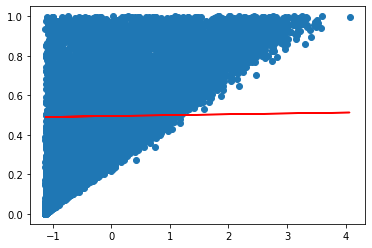

In [59]:
X_first = X_train[:, 0]
fix, ax = plt.subplots()
ax.scatter(X_first, y_train)
print(model.coef_)
print(model.intercept_)
ax.plot(X_first, model.coef_[0] * X_first + model.intercept_, color="red")

In [60]:
test_df = pd.read_csv("./test.tsv", sep='\t', header=None)
test_data = test_df.to_numpy()
X_test = test_data[:, :]  # select columns 1 through end
X_test = std_scaler.transform(X_test)
# X_test = X_test[:, 0].reshape(-1, 1) # drop
y_predicted = model.predict(X_test)

with open("result.txt", "w") as file:
    y_predicted.tofile(file, sep="\n")